###### Assignment -02
##### Name: Vakeesan.K
##### Index NO: 190643G

In [10]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import math
import random


# np.random.seed ( 0 )
N = 100
half_n = N// 2
r = 10
s = r /16
t = np.random.uniform(0 , 2*np.pi , half_n )
n = s*np.random.randn ( half_n )
x , y = ( r + n)*np.cos ( t ) , ( r + n)*np.sin ( t )
X_circ = np.hstack ( ( x.reshape ( half_n , 1 ) , y.reshape ( half_n , 1 ) ) )
m, b = -1, 2
x = np.linspace (-12, 12 , half_n )
y = m*x + b + s*np.random.randn ( half_n )
X_line = np.hstack ( ( x.reshape ( half_n , 1 ) , y.reshape ( half_n , 1 ) ) )
X = np.vstack ( ( X_circ , X_line ) )

#plot the coordinate set
fig, ax = plt.subplots()
xs = [x[0] for x in X]
ys = [x[1] for x in X]
plt.scatter(xs, ys)
plt.xlim(-20,20)
plt.ylim(-20,20)
#ransac
#our data set X={(xi,yi)}
num_iterations=math.inf
iterations_done =0

max_inlier_count = 0
best_model = None

prob_outlier = 0.5
desired_prob = 0.95
#temp_arr=[]
inlier_max_count=0
p=0.99 #ideal value
t=2 #ideal expected noise or threshold

while(num_iterations > iterations_done):
    #estimate x,y,r from three radom points
    cor_1,cor_2,cor_3= random.choices(X,k=3)
    #fina a circle through the three points
    x1=cor_1[0]
    y1=cor_1[1]
    x2=cor_2[0]
    y2=cor_2[1]
    x3=cor_3[0]
    y3=cor_3[1]

    c = (x1-x2)**2 + (y1-y2)**2
    a = (x2-x3)**2 + (y2-y3)**2
    b = (x3-x1)**2 + (y3-y1)**2
    s = 2*(a*b + b*c + c*a) - (a*a + b*b + c*c) 
    px = (a*(b+c-a)*x1 + b*(c+a-b)*x2 + c*(a+b-c)*x3) / s
    py = (a*(b+c-a)*y1 + b*(c+a-b)*y2 + c*(a+b-c)*y3) / s 
    ar = a**0.5
    br = b**0.5
    cr = c**0.5 
    r = ar*br*cr / ((ar+br+cr)*(-ar+br+cr)*(ar-br+cr)*(ar+br-cr))**0.5
    #select the points within the donut region
    
    inlier_count=0
    abs_error=0
    
    for i in X:
        x_=i[0]
        y_=i[1]
        if(abs(np.sqrt(pow(x_-px,2)+pow(y_-py,2))-r)<t):
            inlier_count+=1
            abs_error+=np.abs(np.sqrt(pow(x_-px,2)+pow(y_-py,2))-r)
            #temp_arr.append([x_,y_])

    #selecting the second circle 
    if (inlier_count>threshold_inlier_count):
        if ((inlier_max_count<=inlier_count) and inlier_count!=0):
            inlier_max_count=inlier_count
            arr.append([inlier_max_count,abs_error/inlier_count,px,py,r,cor_1,cor_2,cor_3]) 
    #loop condition
    prob_outlier = 1 - inlier_count/N
    try:
        num_iterations = math.log(1 - desired_prob)/math.log(1 - (1 - prob_outlier)**3)
    except ZeroDivisionError :
        pass
    iterations_done = iterations_done + 1
            
    
if(len(arr)>0):
    new_arr=[]
    max=arr[-1][0]
    for j in arr:
        if max<=j[0]:
            new_arr.append(j)
    #if there are so many points then look into abs mean error
    min_error=new_arr[0][1]
    index=0
    for k in range(len(new_arr)):
        if new_arr[k][1]<min_error:
            index=k
    cent_x=new_arr[index][2]
    cent_y=new_arr[index][3]
    cent_r=new_arr[index][4]
    print(cent_x,cent_y,cent_r)
    

0.4040588558526548 -0.09053797485416337 9.938049535574986


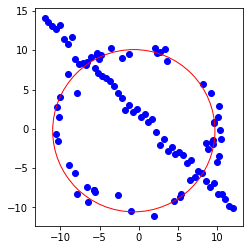

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import random

def data_generator():
    x_data = []
    y_data = []

# 	a = 2
# 	b = 3
# 	r = 100

# 	for i in np.arange(a - r, a + r, 1):
# 		x = i
# 		y = 0
# 		y1, y2 = circle_func(a, b, r, x)
# 		if np.random.randn() > 0:
# 			y += y1 + np.random.randn()*5
# 		else:
# 			y += y2 + np.random.randn()*5
# 		x_data.append(x)
# 		y_data.append(y)
# np.random.seed ( 0 )
    N = 100
    half_n = N// 2
    r = 10
    s = r /16
    t = np.random.uniform(0 , 2*np.pi , half_n )
    n = s*np.random.randn ( half_n )
    x , y = ( r + n)*np.cos ( t ) , ( r + n)*np.sin ( t )
    X_circ = np.hstack ( ( x.reshape ( half_n , 1 ) , y.reshape ( half_n , 1 ) ) )
    m, b = -1, 2
    x = np.linspace (-12, 12 , half_n )
    y = m*x + b + s*np.random.randn ( half_n )
    X_line = np.hstack ( ( x.reshape ( half_n , 1 ) , y.reshape ( half_n , 1 ) ) )
    X = np.vstack ( ( X_circ , X_line ) )
    xs = [x[0] for x in X]
    ys = [x[1] for x in X]
    return xs,ys 

def circle_func(a, b, r, x):
    return (np.sqrt(r**2-(x-a)**2) + b, -np.sqrt(r**2-(x-a)**2) + b)

class RANSAC:
    def __init__(self, x_data, y_data, n):
        self.x_data = x_data
        self.y_data = y_data
        self.n = n
        self.d_min = 99999
        self.best_model = None

    def random_sampling(self):
        sample = []
        save_ran = []
        count = 0

# get three points from data
        while True:
            ran = np.random.randint(len(self.x_data))

            if ran not in save_ran:
                sample.append((self.x_data[ran], self.y_data[ran]))
                save_ran.append(ran)
                count += 1

                if count == 3:
                    break

        return sample
    
# calculate A, B, C value from three points by using matrix
#pt1 = sample[0]
#pt2 = sample[1]
#pt3 = sample[2]
# A = np.array([[pt2[0] - pt1[0], pt2[1] - pt1[1]], [pt3[0] - pt2[0], pt3[1] - pt2[1]]]) 
# B = np.array([[pt2[0]**2 - pt1[0]**2 + pt2[1]**2 - pt1[1]**2], [pt3[0]**2 - pt2[0]**2 + pt3[1]**2 - pt2[1]**2]])		
# inv_A = inv(A)

# c_x, c_y = np.dot(inv_A, B) / 2
# c_x, c_y = c_x[0], c_y[0]
# r = np.sqrt((c_x - pt1[0])**2 + (c_y - pt1[1])**2)
    def make_model(self, sample):
        cor_1=sample[0]
        cor_2=sample[1]
        cor_3=sample[2]
        x1=cor_1[0]
        y1=cor_1[1]
        x2=cor_2[0]
        y2=cor_2[1]
        x3=cor_3[0]
        y3=cor_3[1]

        c = (x1-x2)**2 + (y1-y2)**2
        a = (x2-x3)**2 + (y2-y3)**2
        b = (x3-x1)**2 + (y3-y1)**2
        s = 2*(a*b + b*c + c*a) - (a*a + b*b + c*c) 
        c_x = (a*(b+c-a)*x1 + b*(c+a-b)*x2 + c*(a+b-c)*x3) / s
        c_y = (a*(b+c-a)*y1 + b*(c+a-b)*y2 + c*(a+b-c)*y3) / s 
        ar = a**0.5
        br = b**0.5
        cr = c**0.5 
        r = ar*br*cr / ((ar+br+cr)*(-ar+br+cr)*(ar-br+cr)*(ar+br-cr))**0.5
        return c_x, c_y, r

    def eval_model(self, model):
        d = 0
        c_x, c_y, r = model

        for i in range(len(self.x_data)):
            dis = np.sqrt((self.x_data[i]-c_x)**2 + (self.y_data[i]-c_y)**2)

            if dis >= r:
                d += dis - r
            else:
                d += r - dis
        return d

    def execute_ransac(self):
        # find best model
        for i in range(self.n):
            model = self.make_model(self.random_sampling())
            d_temp = self.eval_model(model)
            if self.d_min > d_temp:
                self.best_model = model
                self.d_min = d_temp


if __name__ == '__main__':
	# make data
	x_data, y_data = data_generator()

	# show data by scatter type
	plt.scatter(x_data, y_data, c='blue', marker='o', label='data')

	# make ransac class
	# n: how many times try sampling
	ransac = RANSAC(x_data, y_data, 50)
	
	# execute ransac algorithm
	ransac.execute_ransac()
	
	# get best model from ransac
	a, b, r = ransac.best_model[0], ransac.best_model[1], ransac.best_model[2]

	# show result
	circle = plt.Circle((a, b), radius=r, color='r', fc='y', fill=False)
	plt.gca().add_patch(circle)

	plt.axis('scaled')

	# plt.tight_layout()
	plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_2436\2712270552.py:20: RuntimeWarning: invalid value encountered in double_scalars
  px = (a*(b+c-a)*x1 + b*(c+a-b)*x2 + c*(a+b-c)*x3) / s
C:\Users\USER\AppData\Local\Temp\ipykernel_2436\2712270552.py:21: RuntimeWarning: invalid value encountered in double_scalars
  py = (a*(b+c-a)*y1 + b*(c+a-b)*y2 + c*(a+b-c)*y3) / s
C:\Users\USER\AppData\Local\Temp\ipykernel_2436\2712270552.py:25: RuntimeWarning: invalid value encountered in double_scalars
  r = ar*br*cr / ((ar+br+cr)*(-ar+br+cr)*(ar-br+cr)*(ar+br-cr))**0.5


In [1]:
import warp
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
# example of affine warp of im1 onto im2
im1 = cv.imread(r"D:\01.Vakeesan_vk\01.academics\04. 4 th semester\8 - EN2550 - Fundamentals of image processing\assignment 2\005.jpg ")
im2 = cv.imread(r" D:\01.Vakeesan_vk\01.academics\04. 4 th semester\8 - EN2550 - Fundamentals of image processing\assignment 2\Flag_of_the_United_Kingdom.svg.png")
im1 is not None
im2 is not None 

tp = np.array([[264,538,540,264],[40,36,605,605],[1,1,1,1]])
im3 = warp.image_in_image(im1,im2,tp)
plt.figure()
plt.imshow(im3)
plt.axis('equal')
plt.axis('off')
plt.show()
# set to points
#cross dissolve
t=0.5
img_halfway=(1-t)*img1+t*img2


ModuleNotFoundError: No module named 'warp'

In [1]:
import matplotlib
matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor


import numpy as np
import sys

points1=None
points2 = None
list1 = []
list2 = []

H = None;
fig, ax = plt.subplots(1, 2)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
def cp(t1, t2):
    """
    Given N >= 4 correlated points from 2 images
    computes the homography parameter from Image 1 to
    Image 2
    Args:
        t1 (ndarray): Points in Image 1 (2xN).
        t2 (ndarray): Corresponding points in Image 2 (2xN).
    Returns:
        ndarray: 3 x 3 homography matrix H.
    """

    n = len(t1)
    A = []
    n -= 1
    while n is not -1:
        A.append([t1[n][0], t1[n][1], 1, 0, 0, 0, -t2[n][0] * t1[n][0], -t2[n][0] * t1[n][1], -t2[n][0]])
        A.append([0, 0, 0, t1[n][0], t1[n][1], 1, -t2[n][1] * t1[n][0], -t2[n][1] * t1[n][1], -t2[n][1]])
        n -= 1
    A=np.asarray(A)
    U,Z,V= np.linalg.svd(A)
    h = V[-1,:]
    H = np.reshape(h,(3,3))
    H /= H[2][2]
    return H
def wi(inputIm, refIm, H):
    """ Warps Input Image onto the Reference Image using the homography matrix
    H via inverse warp.
    Args:
        inputIm (ndarray): Image to be warped.
        refIm (ndarray): Reference Image.
        H (type): Description of parameter `H`.
    Returns:
        (ndarray, ndarray): Returns the warped version of the input image and
        the warped input image on the reference image.
    """

    H_inv = np.linalg.inv(H)
    inputH, inputW, c = inputIm.shape
    outputH, outputW, c = refIm.shape
    min_x = float("inf")
    min_y = float("inf")
    max_x = float("-inf")
    max_y = float("-inf")
    cornersi =  [(0,0), (inputH, inputW), (0, inputW), (inputH, 0)]
    cornerso =  [(0,0), (inputH, inputW), (0, inputW), (inputH, 0)]
    for i,j in cornersi:
            x, y, w = np.matmul(H, [j , i, 1])
            x = x/w
            y = y/w
            if x > max_x:
                max_x = int(x)
            if x < min_x:
                min_x = int(x)
            if y > max_y:
                max_y = int(y)
            if y < min_y:
                min_y = int(y)
    warpIm = np.zeros((max_y - min_y,max_x - min_x, 3))
    for i in range(0, max_x - min_x):
        for j in range (0, max_y - min_y):
            x, y, w = np.matmul(H_inv, [i + min_x, j + min_y, 1])
            x = int(x/w)
            y = int(y/w)
            a = 0
            b = 0
            c = 0
            if not (y < 0 or y >= inputH or x < 0 or x >= inputW):
                a, b, c = inputIm[y, x, :]
            warpIm[j, i, :] = [a/255, b/255, c/255]
    oldx = min_x
    oldy = min_y
    oldmx = max_x
    oldmy = max_y
    for i,j in cornerso:
        if j > max_x:
            max_x = int(j)
        if j < min_x:
            min_x = int(j)
        if i > max_y:
            max_y = int(i)
        if i < min_y:
            min_y = int(i)
    mergeIm = np.zeros(((max_y - min_y),(max_x - min_x), 3))
    for i in range(min_x, max_x):
        for j in range (min_y, max_y):
            a = 0
            b = 0
            c = 0
            if not (j < oldy or j >= oldmy or i < oldx or i >= oldmx):
                a, b, c = warpIm[j - oldy, i - oldx, :]
                if a == 0.0 or b == 0.0 or c == 0.0:
                    if not (j < 0 or j >= outputH or i < 0 or i >= outputW):
                        a, b, c = refIm[j, i, :]/255
            else:
                if not (j < 0 or j >= outputH or i < 0 or i >= outputW):
                    a, b, c = refIm[j, i, :]/255
            mergeIm[j - min_y, i- min_x, :] = [a, b, c]

    return (warpIm, mergeIm)
def argCheck():
    if len(sys.argv) > 4:
        return ((sys.argv[2][-3:] == "jpg" or sys.argv[2][-4:] == "jpeg")
            and (sys.argv[3][-3:] == "jpg" or sys.argv[3][-4:] == "jpeg"))
    else:
        print("Insufficient number of arguments.")

def onclick(event):
    global points1, points2
    if (event.inaxes == ax[0] and onclick.listControl):
        list1.append( [int(event.xdata), int(event.ydata)])
        points1 = np.asarray(list1)
        print((int(event.xdata), int(event.ydata)))
        onclick.listControl = not onclick.listControl
        pointColor = colors[(len(points1) - 1) % len(colors)]
        ax[0].scatter(int(event.xdata), int(event.ydata), c=pointColor, alpha=0.7)
        plt.show()
    elif (event.inaxes == ax[1] and  not onclick.listControl):
        list2.append( [int(event.xdata), int(event.ydata)] )
        points2 = np.asarray(list2)
        print((int(event.xdata), int(event.ydata)))
        pointColor = colors[(len(points2) - 1) % len(colors)]
        ax[1].scatter(int(event.xdata), int(event.ydata), c=pointColor, alpha=0.7)
        onclick.listControl = not onclick.listControl


if __name__ == "__main__":
    if (not argCheck()):
        exit()

    img1 = plt.imread("D:\01.Vakeesan_vk\01.academics\04. 4 th semester\8 - EN2550 - Fundamentals of image processing\img_process\assignment_02\003.jpg")
    img2 = plt.imread("D:\01.Vakeesan_vk\01.academics\04. 4 th semester\8 - EN2550 - Fundamentals of image processing\img_process\assignment_02\Flag_of_the_United_Kingdom.svg.png")
    ax[0].imshow(img1)
    ax[1].imshow(img2)

    try:
        points = np.load(sys.argv[1] + sys.argv[4])
        points1 = points[0][:][:].T
        points2 = points[1][:][:].T
    except:
        onclick.listControl = True
        cursor = Cursor(ax[0], horizOn=True, vertOn=True,useblit=False, color='white', linewidth=1)
        cursor1 = Cursor(ax[1], horizOn=True, vertOn=True,useblit=False, color='white', linewidth=1)
        cid = fig.canvas.mpl_connect('button_release_event', onclick)
        plt.show()

    points = np.asarray([points1.T, points2.T])
    np.save(sys.argv[1] + sys.argv[4], points)

    if len(points1) == len(points2) and len(points1) > 3:
        H = cp.computeH(points1, points2)
        (warpIm, mergeIm) = wi.warpImage(img1, img2, H)
        plt.imsave(sys.argv[1] + 'warped.jpg', warpIm)
        plt.imsave(sys.argv[1] + 'merged.jpg', mergeIm)
        ax[0].imshow(warpIm)
        ax[1].imshow(mergeIm)
        plt.show()

<>:34: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:34: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\USER\AppData\Local\Temp\ipykernel_12672\170061161.py:34: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  while n is not -1:


Insufficient number of arguments.


AttributeError: 'IPythonKernel' object has no attribute 'app_wrapper'

In [4]:
import numpy as np
import cv2
def draw_circle(event,x,y,flags,param):
    global mouseX,mouseY
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(255,0,0),-1)
        mouseX,mouseY = x,y
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(20) & 0xFF
    if k == 27:
        break
    elif k == ord('a'):
        print (mouseX,mouseY)

KeyboardInterrupt: 

In [ ]:
#blending two images
#Define alpha and beta
alpha = 0.30
beta = 0.70
#Blend images
final_image = cv2.addWeighted(img1, alpha, img2, beta, 0.0)

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sift import *

Image1_gray = cv2.imread(r'D:\01.Vakeesan_vk\01.academics\04. 4 th semester\8 - EN2550 - Fundamentals of image processing\img_process\assignment_02\img1.ppm',cv2.COLOR_BGR2GRAY)
Image2_gray = cv2.imread(r'.\assignment_02\img5.ppm ',cv2.COLOR_BGR2GRAY)

#Image1_gray = cv2.cvtColor(Image1, cv2.COLOR_BGR2GRAY)
#Image2_gray = cv2.cvtColor(Image2, cv2.COLOR_BGR2GRAY)
Image1_key_points, Image1_descriptors = extract_sift_features(Image1_gray)
Image2_key_points, Image2_descriptors = extract_sift_features(Image2_gray)
print( 'Displaying SIFT Features')
showing_sift_features(Image1_gray, Image1, Image1_key_points);
norm = cv2.NORM_L2
bruteForce = cv2.BFMatcher(norm)
matches = bruteForce.match(Image1_descriptors, Image2_descriptors)
matches = sorted(matches, key = lambda match:match.distance)
matched_img = cv2.drawMatches(
Image1, Image1_key_points,
Image2, Image2_key_points,
matches[:100], Image2.copy())
plt.figure(figsize=(100,300))
plt.imshow(matched_img)

NameError: name 'extract_sift_features' is not defined

In [2]:
import cv2 as cv
import sys
import numpy as np

img = cv.imread(r'D:\01.Vakeesan_vk\01.academics\04. 4 th semester\8 - EN2550 - Fundamentals of image processing\img_process\assignment_02\img1.ppm')
assert img is not None
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
sift = cv.xfeatures2d.SIFT_create()
keypoints, descriptor = sift.detectAndCompute(gray,None)
img = cv.drawKeypoints(image=img, outImage=img, keypoints =
keypoints, flags = cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINT,
color = (51, 163, 236))
cv.imshow('sift_keypoints', img)
while (True):
    if cv2.waitKey(1000 / 12) & 0xff == ord("q"):
        break
cv.destroyAllWindows()

AttributeError: module 'cv2' has no attribute 'DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINT'